# Q-Learning for Frozen-walk game

This notebook aims at familiarizing you with training, validating and testing a reinforncement learning agent using Q-Learning. Here are the requirements:

- Initiate a Frozen lake environment.
- Initiate an agent.
- Train the agent using <b>Q-Learning</b>.
- Print out the optimal policy, i.e., what is the best action at a stage.
- Compare and discuss the performance of the optimal policy obtained by Q-Learning with the optimal policy obtained by Deep Q-Learning in the demo.

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

![Frozen walk](https://gymnasium.farama.org/_images/frozen_lake.gif)

More details can be found at https://gymnasium.farama.org/environments/toy_text/frozen_lake/.

### Install libraries and initiate a frozen lake map

In [1]:
# Install gymnasium game environment
!pip install gymnasium
!pip install gymnasium[toy-text]

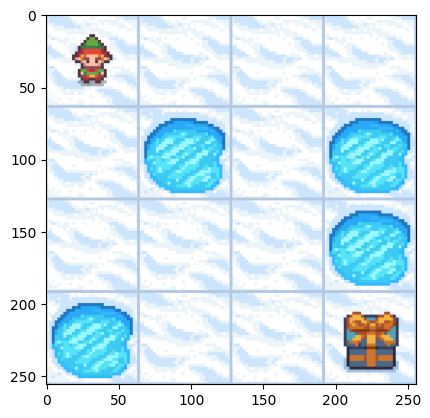

In [2]:
### Please do not change this code

# Load libraries
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import imageio
import pandas as pd
from IPython.display import Image

# Define environment map
custom_map = [
    'SFFF',
    'FHFH',
    'FFFH',
    'HFFG'
]

# Initialize the environment\
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=False, render_mode='rgb_array')
state_size = env.observation_space.n    # Number of states
action_size = env.action_space.n    # Number of actions of this game: four, 0: left, 1:down, 2: right, 3: up.
env.reset()    # Reset environment, i.e., set agent position to state 0
plt.imshow(env.render())    # Visualize environment map

### Initialize an agent

In [3]:
# Define agent attibutes and methods
class Agent:
    def __init__(self, state_size, action_size):
        self.alpha = 0.001    # Learning rate
        self.epsilon = 1    # Start (max) value of epsilon
        self.min_eps = 0.01    # End (min) value of epsilon
        self.eps_decay = 0.003     # Decay factor for decreasing epsilon over episodes
        self.gamma = 0.9    # Discount factor
        self.state_size = state_size    # Number of states
        self.action_size =  action_size    # Number of possible actions the agent can take: four, 0: left, 1:down, 2: right, 3: up.    self.max_steps = 50    # Maximum number of steps the agent can carry out in an episode
        self.train_episodes = 1001    # Number of training episodes
        self.episode = 0     # Agent current episode

# Initialize a reinforcement learning agent
agent = Agent(state_size, action_size)

### Train the agent

In [4]:
# Initialize the Q-table with zeros, where rows represent states and columns represent actions
qtable = np.zeros((env.observation_space.n, env.action_space.n))

outcomes = []    # List to store the outcomes of each episode for plotting
reward_episodes = []    # Track rewards over episodes
step_episodes = []    # Track number of steps (in each episode until termination) over episodes
epsilon_episodes = []    # Track epsilon values over episodes

# Training the agent through episodes
for episode in range(agent.train_episodes):
    step = 0
    agent.episode = episode
    state, _ = env.reset()
    terminated = False

    img_lst = [env.render()]    # Initialize list to store visualization frames

    # By default, we consider our outcome to be a failure for this episode
    outcomes.append("Failure")

    # Continue the episode until the agent reaches the goal or falls into a hole
    while not terminated:
        step += 1

        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If the random number is less than epsilon, take a random action (Exploration)
        if rnd < agent.epsilon:
            action = env.action_space.sample()
        # Otherwise, choose the action with the highest Q-value for the current state (Exploitation)
        else:
            action = np.argmax(qtable[state])

        # Implement the selected action and move the agent to the next state
        new_state, reward, terminated, _, info = env.step(action)

        # Update Q(s,a) based on the observed reward and new state
        qtable[state, action] = qtable[state, action] + agent.alpha * (reward + agent.gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state to the new state
        state = new_state

        # If the agent receives a reward, it means that the outcome for this episode is a success
        if reward:
            outcomes[-1] = "Success"

        # Render map imgage for visualization every K episodes
        if agent.episode % 50 == 0:
            animation_file = "training_episode_" + str(agent.episode) + "_steps_" + str(step) + ".gif"
            img = env.render()    # Render current environment image
            img_lst.append(img)    # Append environment images to make animation

    print("Episode: " + str(agent.episode) + ", Steps: " + str(step) + ", epsilon: " + str(round(agent.epsilon,2)) + ", Reward: " + str(reward))
    reward_episodes.append(reward)    # Add reward to list for tracking purpose
    step_episodes.append(step)    # Add step to list for tracking purpose
    epsilon_episodes.append(agent.epsilon)    # Add epsilon to list for tracking purpose

    ### Update epsilon value which is the ratio of exploitation and exploration
    if agent.epsilon < agent.min_eps:
        agent.epsilon = agent.min_eps    # Set the minimum value of epsilon so that there is always a chance for exploration.
    else:
        agent.epsilon = np.exp(-agent.eps_decay*agent.episode)    # Decrease exploration / Increase exploitation overtime as the agent knows more about the environment

    ### Write animation of the training episode (n*K)th
    if len(img_lst)>1:
        imageio.mimsave(animation_file, img_lst, format='GIF', duration=0.5)

Episode: 0, Steps: 12, epsilon: 1, Reward: 0.0
Episode: 1, Steps: 6, epsilon: 1.0, Reward: 0.0
Episode: 2, Steps: 5, epsilon: 1.0, Reward: 0.0
Episode: 3, Steps: 8, epsilon: 0.99, Reward: 0.0
Episode: 4, Steps: 22, epsilon: 0.99, Reward: 0.0
Episode: 5, Steps: 7, epsilon: 0.99, Reward: 0.0
Episode: 6, Steps: 4, epsilon: 0.99, Reward: 0.0
Episode: 7, Steps: 12, epsilon: 0.98, Reward: 0.0
Episode: 8, Steps: 5, epsilon: 0.98, Reward: 0.0
Episode: 9, Steps: 16, epsilon: 0.98, Reward: 0.0
Episode: 10, Steps: 27, epsilon: 0.97, Reward: 0.0
Episode: 11, Steps: 13, epsilon: 0.97, Reward: 0.0
Episode: 12, Steps: 4, epsilon: 0.97, Reward: 0.0
Episode: 13, Steps: 9, epsilon: 0.96, Reward: 0.0
Episode: 14, Steps: 5, epsilon: 0.96, Reward: 0.0
Episode: 15, Steps: 11, epsilon: 0.96, Reward: 0.0
Episode: 16, Steps: 6, epsilon: 0.96, Reward: 0.0
Episode: 17, Steps: 12, epsilon: 0.95, Reward: 0.0
Episode: 18, Steps: 8, epsilon: 0.95, Reward: 0.0
Episode: 19, Steps: 2, epsilon: 0.95, Reward: 0.0
Episode

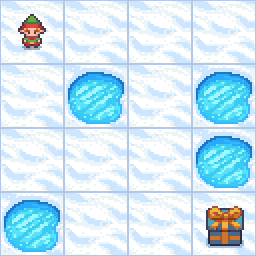

In [20]:
# Display the animation gif at the training episode of 400 steps animation
Image('/content/training_episode_400_steps_8.gif')

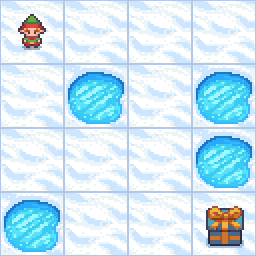

In [21]:
# Display the animation gif at the training episode of 600 steps animation
Image('/content/training_episode_500_steps_6.gif')

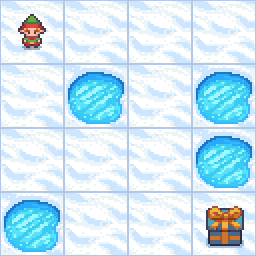

In [23]:
# Display the animation gif at the training episode of 800 steps animation
Image('/content/training_episode_800_steps_6.gif')

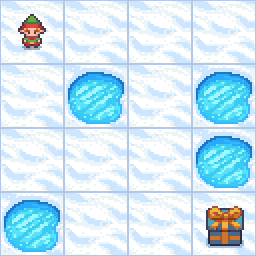

In [26]:
# Display the animation gif at the training episode of 1000 steps animation
Image('/content/training_episode_1000_steps_6.gif')

### Evaluation

In [7]:
print('Average success rate of training episodes: ', round(np.mean(reward_episodes),2))

Average success rate of training episodes:  0.63


In [8]:
print()
print('===========================================')
print('Q-table after training:')
print(qtable)


Q-table after training:
[[8.37469506e-08 1.15045774e-10 4.55279576e-05 1.50955310e-07]
 [3.07782716e-08 0.00000000e+00 4.30588151e-04 1.45180571e-06]
 [1.21271160e-06 3.44399396e-03 1.59518639e-08 1.81783851e-05]
 [4.50102332e-06 0.00000000e+00 6.68916143e-10 6.41543271e-10]
 [9.64319557e-12 2.99090690e-08 0.00000000e+00 6.58739075e-12]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.28024240e-02 0.00000000e+00 1.23532163e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.22256428e-11 0.00000000e+00 7.04369874e-06 2.28618776e-13]
 [9.10167935e-10 1.28893442e-06 1.37187969e-03 0.00000000e+00]
 [8.14627580e-06 1.22788295e-01 0.00000000e+00 6.64707624e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.24039362e-06 3.99516979e-03 5.35782533e-08]
 [2.77745962e-05 3.22823341e-03 4.70232852e-01 5.80903568e-04]
 [0.00000000e+00 0.00000000e+0

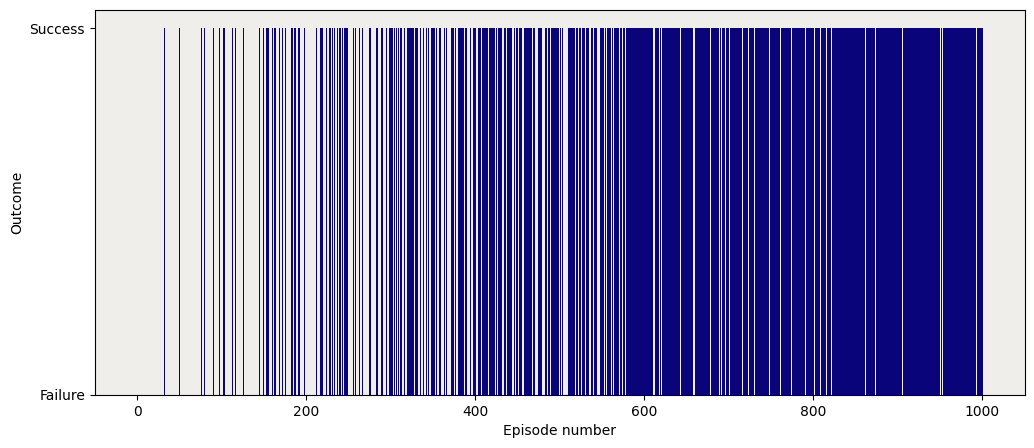

In [9]:
# Plotting the outcomes of each episode
plt.figure(figsize=(12, 5))
plt.xlabel("Episode number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

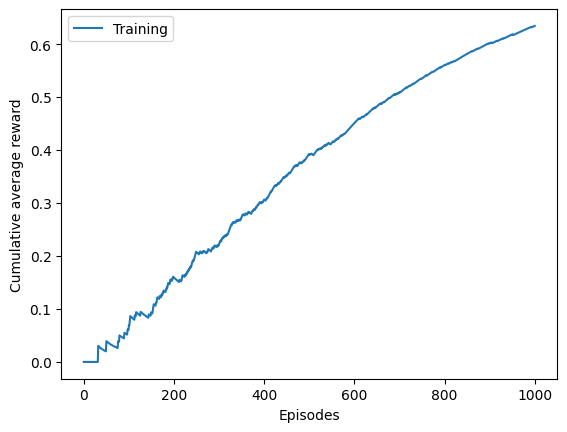

In [10]:
# Plot cumulative average reward (or success rate) of the training phase.
# This shows how well the agent performs in the training phase.
df_reward_episodes = pd.DataFrame(reward_episodes)
cumulative_average_rewards = df_reward_episodes.expanding().mean()
plt.plot(cumulative_average_rewards)
plt.ylabel('Cumulative average reward')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

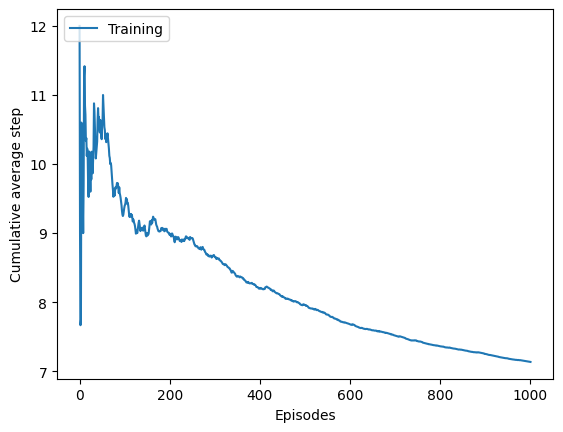

In [11]:
# Plot cumulative average steps of the training phase.
# This shows how well the agent performs in the training phase.
df_step_episodes = pd.DataFrame(step_episodes)
cumulative_average_steps = df_step_episodes.expanding().mean()
plt.plot(cumulative_average_steps)
plt.ylabel('Cumulative average step')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

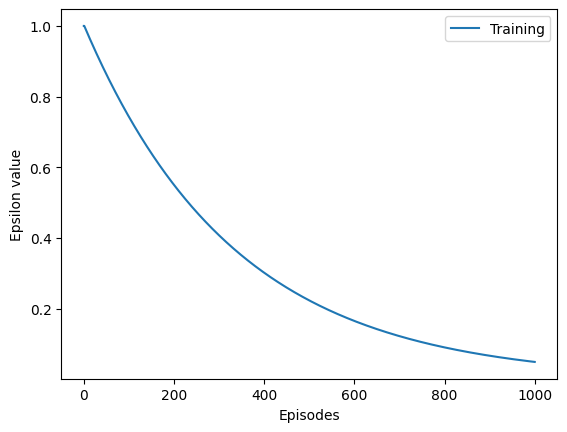

In [12]:
# Plot epsilon values over episodes
plt.plot(epsilon_episodes)
plt.ylabel('Epsilon value')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper right')
matplotlib.rcParams.update({'font.size': 10})
plt.show()

In [13]:
# Set the number of episodes and initialize a variable to count the number of successful episodes
episodes = 100
nb_success = 0

# Evaluation of the success rate over 100 episodes
for _ in range(100):
    # Reset the environment and obtain the initial state
    state, info = env.reset()
    terminated = False

    # Continue the episode until the agent reaches the goal or falls into a hole
    while not terminated:
        # Choose the action with the highest Q-value for the current state (Exploitation)
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        # If there are no non-negative Q-values (only zeros), take a random action (Exploration)
        else:
            action = env.action_space.sample()

        # Implement the selected action and move the agent to the next state
        new_state, reward, terminated, _, info= env.step(action)

        # Update our current state to the new state
        state = new_state

        # When we receive a reward, it means we successfully solved the game
        nb_success += reward

# Calculate and print the success rate
success_rate = nb_success / episodes * 100
print(f"Success rate = {success_rate:.2f}%")

Success rate = 100.00%


### Print optimal policy

In [14]:
from IPython.display import clear_output
import time

state, info = env.reset()
terminated = False
img_lst = [env.render()]    # Initialize list to store visualization frames
sequence = []

while not terminated:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = env.action_space.sample()

    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, terminated, _, info = env.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    img = env.render()    # Render current environment image
    img_lst.append(img)    # Append environment images to make animation
    time.sleep(1)

imageio.mimsave('optimal_policy.gif', img_lst, format='GIF', duration=0.5)
print(f"Sequence = {sequence}")

Sequence = [2, 2, 1, 1, 1, 2]


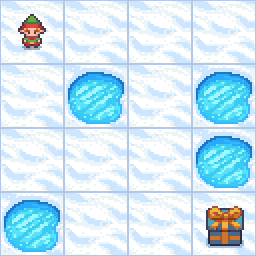

In [15]:
# Display the animation gif at the training episode of 1000 steps animation
Image('optimal_policy.gif')

### Compare and discuss the performance of the optimal policy obtained by Q-Learning with the optimal policy obtained by Deep Q-Learning

⟹ The average success rate of training episodes of Q-Learning is slightly higher than that of Deep Q-Learning. Moreover, the training time for the Q-Learning is also considerably faster than its counterpart for this specific environment. Overall, both models prove their capability of generating a successful optimal policy